# Preprocessing

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing
from sklearn import  linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import numpy as np

# setting params
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

sn.set_style('whitegrid')
sn.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600


In [3]:
hour_df = pd.read_csv('corpus/hour.csv')
print("Shape of dataset:{}".format(hour_df.shape))

Shape of dataset:(17379, 17)


The dataset contains more than 17k records with 17 attributes

In [4]:
print("Head of dataset:\n{}".format(hour_df.head()))


Head of dataset:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [5]:
hour_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
# Rename attributes to make them more understandable and pythonic

hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

In [8]:
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

### Distribution and Trends

[Text(0.5,1,'Season wise hourly distribution of counts')]

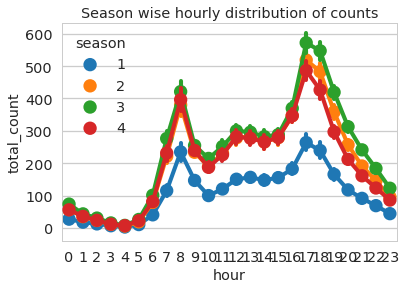

In [9]:
fig, ax = plt.subplots()
sn.pointplot(data=hour_df[['hour',
                          'total_count',
                          'season']],
            x = 'hour', y='total_count',
            hue='season', ax=ax)
ax.set(title="Season wise hourly distribution of counts")

The figure shows similar trends for all seasons with counts peaking in the morning between 7-9 am and in the evening between 4-6 pm. possibly due to high movement during start and end of office hour.
the counts are lowest for the spring seasons, while fall sees highest rides across all 24 hours.

[Text(0.5,1,'Weekday wise hourly distribution of counts')]

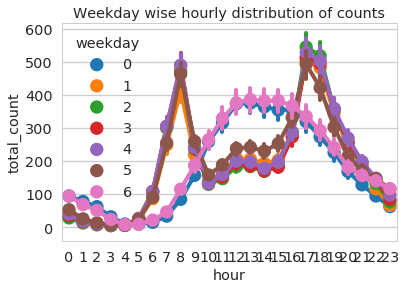

In [10]:
fig, ax = plt.subplots()
sn.pointplot(data=hour_df[['hour',
                          'total_count',
                          'weekday']],
            x = 'hour', y='total_count',
            hue='weekday', ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")

Similarly, distribute of ridership across days of the weeks as presentes interesting trends of higher usage during affternoon hours over weekends, while weekdays see higher usage during morning and evenings

[Text(0.5,1,'Month distribution of counts')]

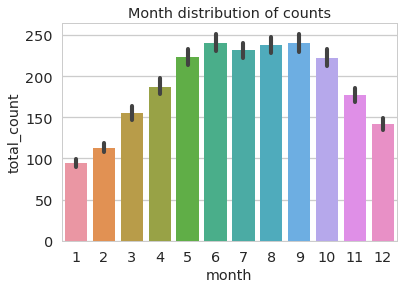

In [11]:
fig, ax = plt.subplots()
sn.barplot(data=hour_df[['month',
                        'total_count']],
          x = "month", y="total_count")
ax.set(title="Month distribution of counts")

The generate barplot showcases a definite trend in ridership based on month of the yeas.
The months June-September see highest redership

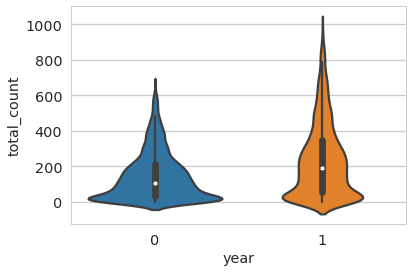

In [12]:
sn.violinplot(data=hour_df[['year',
                           'total_count']],
             x='year', y='total_count')

### Outliers

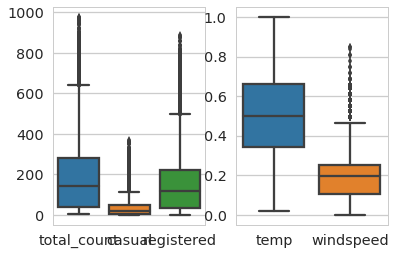

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
sn.boxplot(data=hour_df[['total_count', 'casual', 'registered']], ax=ax1)
sn.boxplot(data=hour_df[['temp', 'windspeed']], ax=ax2)

[Text(0.5,1,'Box Pot for hourly distribution of counts')]

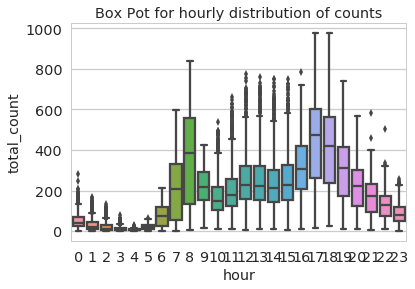

In [14]:
fig, ax = plt.subplots()
sn.boxplot(data=hour_df[['hour', 'total_count']],
           x = "hour", y="total_count", ax=ax)
ax.set(title="Box Pot for hourly distribution of counts")

### Correlations

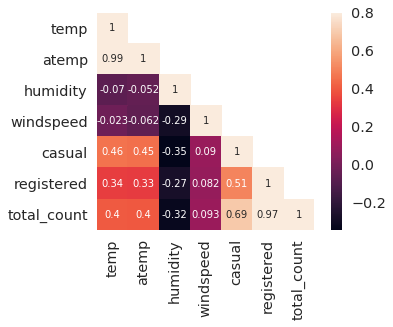

In [15]:
corrMatt = hour_df[["temp", 'atemp', "humidity", "windspeed", "casual", "registered", "total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

# Modeling

In [16]:
def fit_transform_ohe(df, col_name):
    """
    This function preform one hot frame encoding for the specified column.
    
    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        col_name: the couln to be hot encoder
    Returns:
        tuple: label_encoder, one_hot_encoder, transformed column as pandas Series
    """
    # label encode the column
    le = preprocessing.LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name + "_label"] = le_labels
    
    # one hot encoding
    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name + "_label"]]).toarray()
    feature_labels = [col_name + "_" + str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    return le, ohe, features_df

def transform_ohe(df,le,ohe,col_name):
    """This function performs one hot encoding for the specified
        column using the specified encoder objects.

    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        le(Label Encoder): the label encoder object used to fit label encoding
        ohe(One Hot Encoder): the onen hot encoder object used to fit one hot encoding
        col_name: the column to be one hot encoded

    Returns:
        tuple: transformed column as pandas Series

    """
    # label encode
    col_labels = le.transform(df[col_name])
    df[col_name+'_label'] = col_labels
    
    # ohe 
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return features_df

In [17]:
X_train, X_test, y_train, y_test = train_test_split(hour_df.iloc[:,0:-3], 
                                                    hour_df.iloc[:,-1],
                                                    test_size=0.33,
                                                    random_state=42)

X_train.reset_index(inplace=True)
y_train = y_train.reset_index()

X_test.reset_index(inplace=True)
y_test = y_test.reset_index()

In [18]:
cat_attr_list = ["season", "is_holiday", "weather_condition",
                "is_workingday", "hour", "weekday", "month", "year"]
numeric_feature_cols = ['temp','humidity','windspeed','hour','weekday','month','year']
subset_cat_features =  ['season','is_holiday','weather_condition','is_workingday']
encoded_attr_list = []
for col in cat_attr_list:
    return_obj = fit_transform_ohe(X_train, col)
    encoded_attr_list.append({"label_enc":return_obj[0],
                              "ohe_enc":return_obj[1],
                              "feature_df":return_obj[2],
                              "col_name":col})

In [19]:
feature_df_list = [X_train[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df'] for enc in encoded_attr_list if enc['col_name'] in subset_cat_features])
train_df_new = pd.concat(feature_df_list, axis=1)
print("Shape:{}".format(train_df_new.shape))

Shape:(11643, 19)


## Linear Regression

### Training

In [20]:
X = train_df_new
y = y_train.total_count.values.reshape(-1, 1)
lin_reg = linear_model.LinearRegression()

### Validation

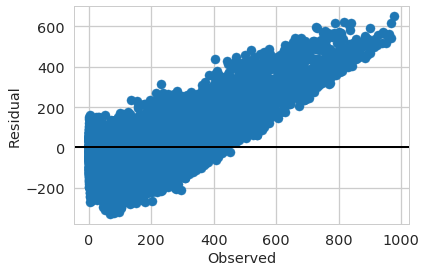

In [21]:
predict = cross_val_predict(lin_reg, X, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, y-predict)
ax.axhline(lw=2, color='black')
ax.set_xlabel("Observed")
ax.set_ylabel("Residual")
plt.show()

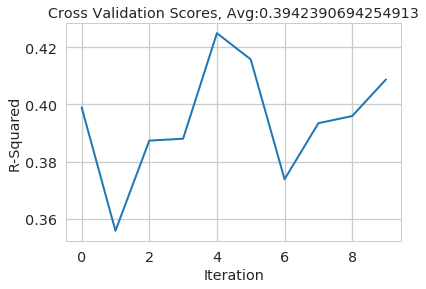

In [22]:
r2_scores = cross_val_score(lin_reg, X, y, cv=10)
mse_scores = cross_val_score(lin_reg, X, y, cv=10, scoring="neg_mean_squared_error")
fig, ax = plt.subplots()
ax.plot([i for i in range(len(r2_scores))],r2_scores,lw=2)
ax.set_xlabel('Iteration')
ax.set_ylabel('R-Squared')
ax.title.set_text("Cross Validation Scores, Avg:{}".format(np.average(r2_scores)))
plt.show()

In [23]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Testing

In [24]:
test_encoded_attr_list = []
for enc in encoded_attr_list:
    col_name = enc['col_name']
    le = enc['label_enc']
    ohe = enc['ohe_enc']
    test_encoded_attr_list.append({'feature_df':transform_ohe(X_test, le, ohe, col_name),
                                  'col_name':col_name})
    test_feature_df_list = [X_test[numeric_feature_cols]]
    test_feature_df_list.extend([enc['feature_df'] for enc in test_encoded_attr_list if enc['col_name'] in subset_cat_features])
    test_df_new = pd.concat(test_feature_df_list, axis=1)
    print("Shape: {}".format(test_df_new.shape))

Shape: (5736, 11)
Shape: (5736, 13)
Shape: (5736, 17)
Shape: (5736, 19)
Shape: (5736, 19)
Shape: (5736, 19)
Shape: (5736, 19)
Shape: (5736, 19)


In [25]:
test_df_new.head()

,temp,humidity,windspeed,hour,weekday,month,year,season_1,season_2,season_3,season_4,is_holiday_0,is_holiday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4,is_workingday_0,is_workingday_1
0,0.80,0.27,0.1940,19,6,6,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.24,0.41,0.2239,20,1,1,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.32,0.66,0.2836,2,5,10,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.78,0.52,0.3582,19,2,5,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.26,0.56,0.3881,0,4,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [26]:
X_test = test_df_new
y_test = y_test.total_count.values.reshape(-1, 1)
y_pred = lin_reg.predict(X_test)
resuduals = y_test - y_pred

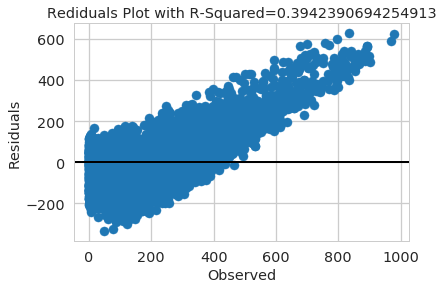

In [27]:
fig, ax = plt.subplots()
ax.scatter(y_test, resuduals)
ax.axhline(lw=2, color='black')
ax.set_xlabel("Observed")
ax.set_ylabel("Residuals")
ax.title.set_text("Rediduals Plot with R-Squared={}".format(np.average(r2_scores)))
plt.show()